---
# What are the marginal and the conditional probabilities?
---

In this script, we show the 1-D marginal and 1-D conditional probability density functions (PDF) for a 2-D gaussian PDF.

The matrix-form equation for the 2-D gausian PDF is: 

<blockquote>  $P(\bf{x}) = \frac{1}{2\pi |\Sigma|^{0.5}} \exp{[-\frac{1}{2}(\bf{x}-\bf{\mu})^\top \Sigma^{-1} (\bf{x}-\bf{\mu})]}$  </blockquote>

where 

<blockquote>  $\bf{x}=[x_{1} x_{2}]^\top$ </blockquote> 

<blockquote>  $\mathbb{E}[\bf{x}] = \bf{\mu} = [\mu_{1} \mu_{2}]^\top$  </blockquote> 

<blockquote>  $\Sigma = \begin{pmatrix} \sigma_{x_{1}}^2 & \rho\sigma_{x_{1}}\sigma_{x_{2}} \\ \rho\sigma_{x_{1}}\sigma_{x_{2}} & \sigma_{x_{2}}^2 \end{pmatrix}$ </blockquote>

                  
and $\rho$ is the correlation factor between the $x_{1}$ and $x_{2}$ data. 

<br><br>
Instead of guessing the values of $\sigma_{x_{1}}$, $\sigma_{x_{2}}$ and $\rho$ to create a 
covariance matrix $\Sigma$ for visualization purpose, we can design $\Sigma$ with some desired characteristics. 

First, we generate the covariance matrix for an uncorrelated PDF; its principal axes are oriented along the 
$x_{1}$ and $x_{2}$ axes.

<blockquote>  $\Sigma_{PA} = \begin{pmatrix} \sigma_{1}^2 & 0 \\ 0 & \sigma_{2}^2 \end{pmatrix}$ </blockquote>

Next, we define a rotation matrix with a given angle $\theta$:

<blockquote>  $R = \begin{pmatrix} \cos{\theta}  & -\sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{pmatrix}$ </blockquote>

The covariance matrix we are looking for is 

<blockquote>  $\Sigma = R \Sigma_{PA} R^\top $ </blockquote>

Hence, we only have to specify the values of $\sigma_{1}$ and $\sigma_{2}$ along principal axes and a 
rotation angle $\theta$. The correlation coefficient $\rho$ depends on the value of $\theta$:

<blockquote>  $\rho>0$ when $\theta>0$ </blockquote>
<blockquote>  $\rho<0$ when $\theta<0$ </blockquote>

<br><br>
N.B. For ease of reading, we use below the variables x and y instead of x1 and x2. The final results are shown with x1 and x2.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy import stats
from scipy.stats import multivariate_normal

import seaborn as sns; sns.set()
np.random.seed(42)

Here are the characteristics of the 2-D PDF we want to generate:

In [2]:
# Origin of the PDF
Mu = np.array([0.5, 0.5])

# Individual standard deviations
sigma = np.array([0.25, 0.05])

# Rotation angle for a negative correlation 
theta = -45. 


Generate the covariance matrix $\Sigma$:

In [3]:
theta = np.radians(theta)
c, s = np.cos(theta), np.sin(theta)

# Rotation matrix
R = np.array(((c, -s), (s, c)))        

# Covariance matrix for a PDF with its principal axes oriented along the x and y directions
Sigma = np.array([[sigma[0]**2, 0.],[0., sigma[1]**2]])

# Covariance matrix after rotation
Sigma = R.dot( Sigma.dot(R.T) )  


Generate a spatial grid where the various PDF will be evaluated locally

In [4]:
x_min, x_max = 0., 1.
y_min, y_max = 0., 1.
nx, ny = 60, 60
x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x,y) 
pos = np.dstack((xx, yy))    
    

Get the marginal distributions $P(x)$ and $P(y)$. Each one is the probability of an event irrespective 
of the outcome of the other variable.

In [5]:
# Generator for the 2-D gaussian PDF 
modele = multivariate_normal(Mu, Sigma) 
pdf = modele.pdf(pos)

# Project P(x,y) on the x axis to get the marginal 1-D distribution P(x)
pdf_x = multivariate_normal.pdf(x, mean=Mu[0], cov=Sigma[0,0])

# Project P(x,y) on the y axis to get the marginal 1-D distribution P(y)
pdf_y = multivariate_normal.pdf(y, mean=Mu[1], cov=Sigma[1,1])


Get the conditional 1-D distributions $P(x|y=yc)$ and $P(y|x=xc)$. Each one is the probability of one event occurring in 
the presence of a second event. 

In [6]:
# Vertical slice position
xc = 0.3

# Horizontal slice position
yc = 0.7

# Make a vertical slice of P(x,y) at x=xc to get the conditional 1-D distribution P(y|x=xc)
P = np.empty([ny,2])
P[:,0] = xc
P[:,1] = y
pdf_xc = multivariate_normal.pdf(P, mean=Mu, cov=Sigma)

# Make an horizontal slice of P(x,y) at y=yc to get the conditional 1-D distribution P(x|y=yc)
P = np.empty([nx,2])
P[:,0] = x
P[:,1] = yc
pdf_yc = multivariate_normal.pdf(P, mean=Mu, cov=Sigma)


Show the various PDF. The color of each conditional 1-D distribution corresponds to its slice through the 2-D PDF. 

C:\Users\pgsci\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'zdir'
  after removing the cwd from sys.path.


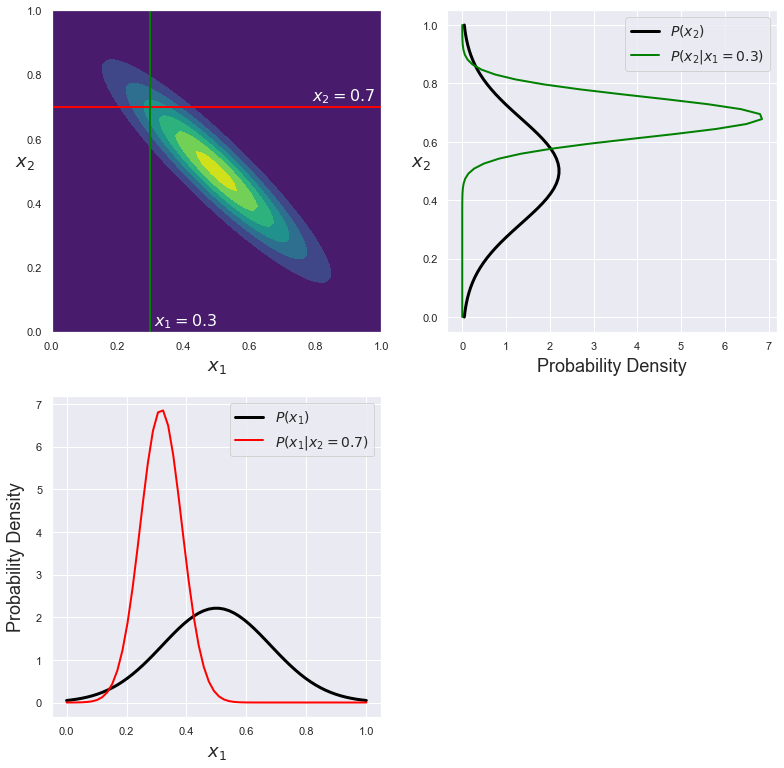

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(13,13))

# Display the 2-D PDF P(x,y)
cset = ax1.contourf(xx, yy, pdf, zdir='z', cmap=cm.viridis, levels=7)
ax1.plot([x_min, x_max], [yc, yc], linewidth=2.0, color='red')
ax1.text(0.79, 0.72,'$x_{2} = 0.7$', fontsize=16, color='white')
ax1.plot([xc, xc], [y_min, y_max], linewidth=2.0, color='green')
ax1.text(0.31, 0.02,'$x_{1} = 0.3$', fontsize=16, color='white')
ax1.set_xlabel('$x_{1}$',fontsize=18)
ax1.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
ax1.xaxis.set_label_coords(0.5, -0.08)
ax1.yaxis.set_label_coords(-0.08, 0.5)

# Display the 1-D conditional PDF P(y|x=xc)
ax2.plot(pdf_y, y, label='$P(x_{2})$', linewidth=3.0, color='black')
ax2.plot(pdf_xc, y, label='$P(x_{2}|x_{1}=0.3)$', linewidth=2.0, color='green')
ax2.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
ax2.set_xlabel('Probability Density',fontsize=18)
ax2.xaxis.set_label_coords(0.5, -0.08)
ax2.yaxis.set_label_coords(-0.08, 0.5)
ax2.legend(loc='best',fontsize=14)

# Display the 1-D conditional PDF P(x|y=yc)
ax3.plot(x, pdf_x, label='$P(x_{1})$', linewidth=3.0, color='black')
ax3.plot(x, pdf_yc, label='$P(x_{1}|x_{2}=0.7)$', linewidth=2.0, color='red')
ax3.set_xlabel('$x_{1}$',fontsize=18)
ax3.set_ylabel('Probability Density',fontsize=18)
ax3.xaxis.set_label_coords(0.5, -0.08)
ax3.yaxis.set_label_coords(-0.08, 0.5)
ax3.legend(loc='best',fontsize=14)

# Hide the unused fouth panel
ax4.axis('off')

plt.savefig('example_of_2D_PDF_with_conditional_1D_PDF.png', format="png")

plt.show()
